<a href="https://colab.research.google.com/github/yudhi-septian/yudhi-septian/blob/main/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

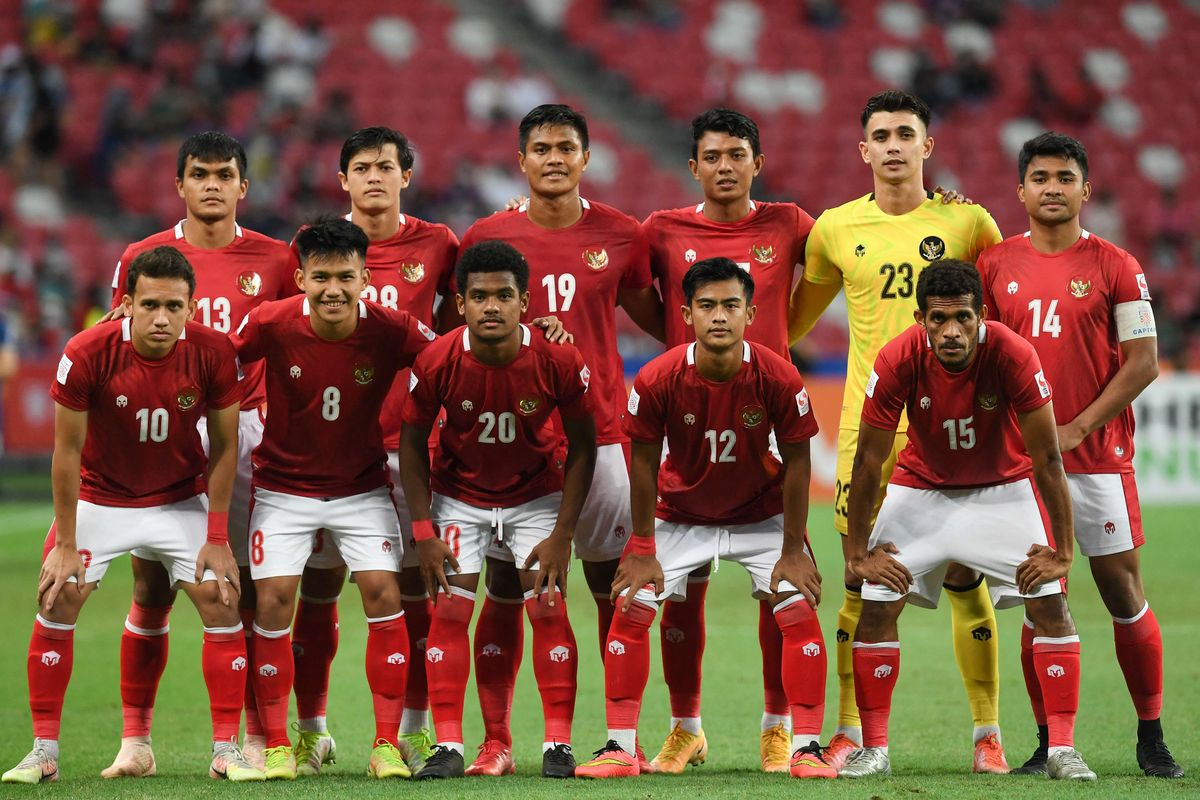

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
img = cv2.imread('sample_data/timnas.jpg')
#template = cv2.imread('sample_data/timnas-template.jpg')
cv2_imshow(img)
#cv2_imshow(template)

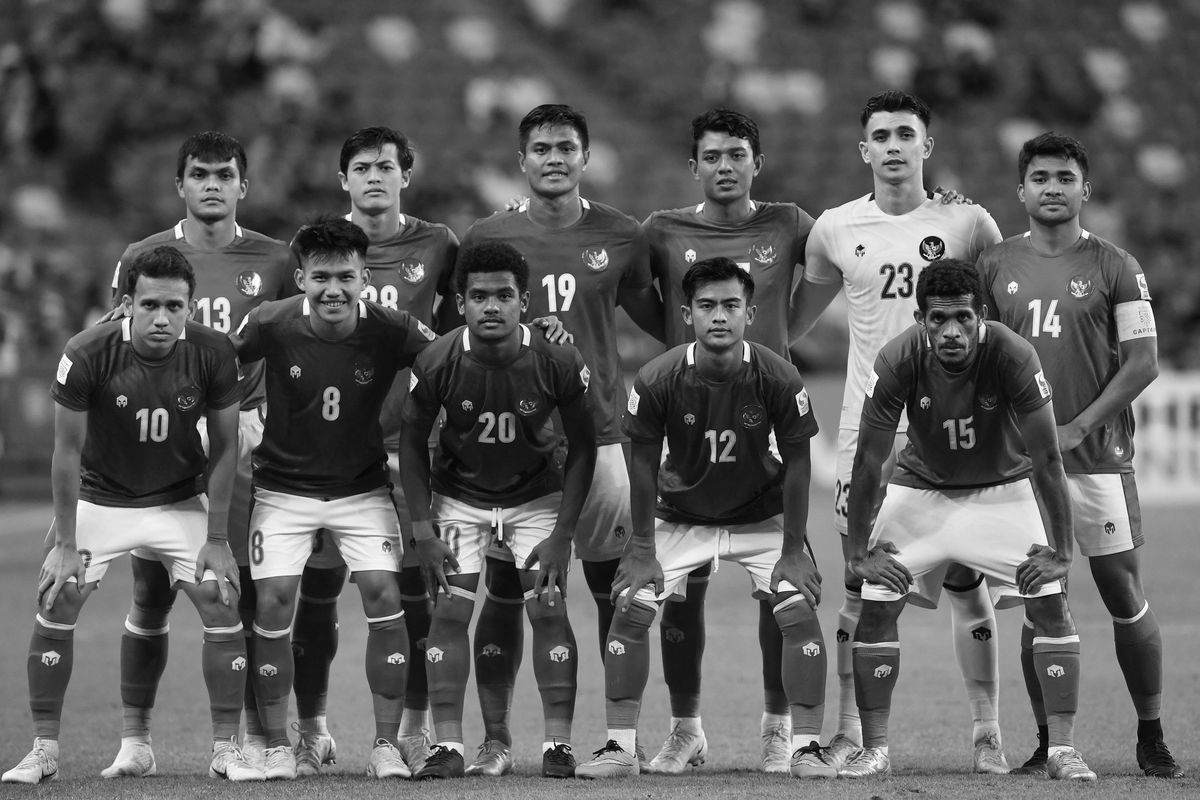

In [31]:

img = cv2.imread('sample_data/timnas.jpg')
#template = cv2.imread('sample_data/timnas-template.jpg')
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
#cv2_imshow(template)

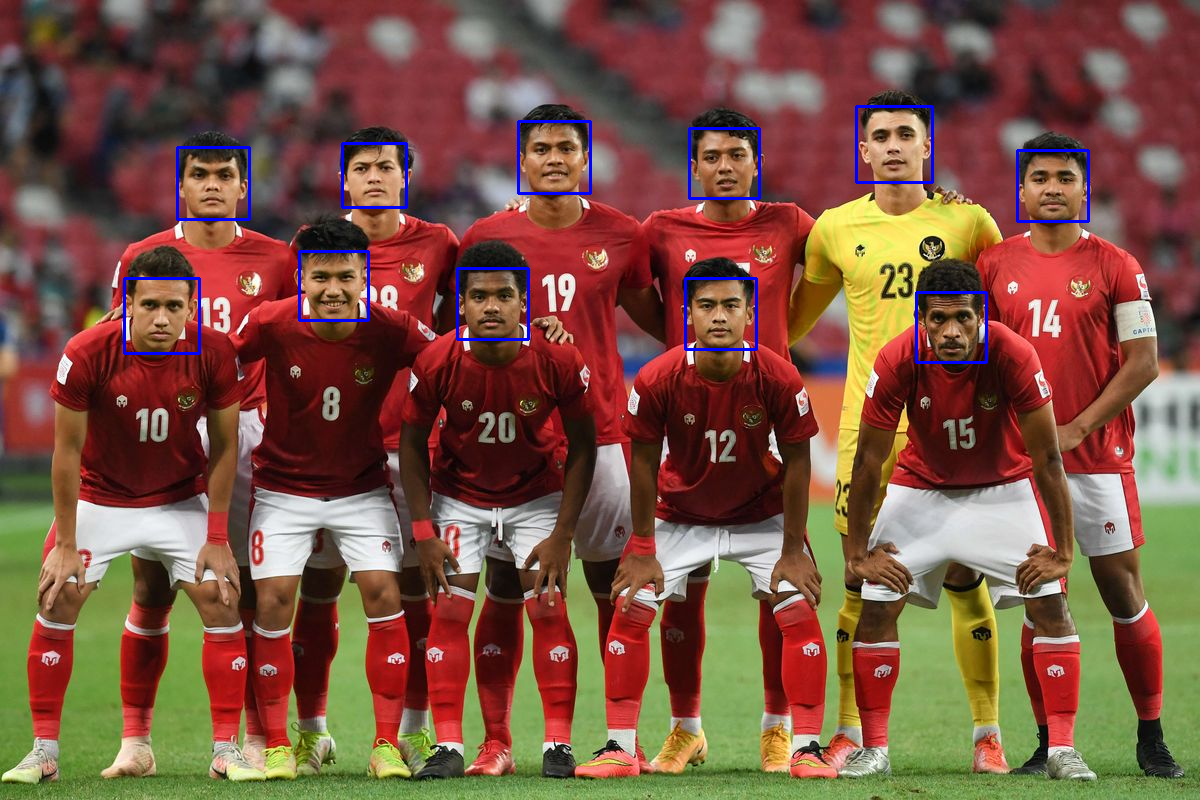

In [34]:
# Menggunakan Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread('sample_data/timnas.jpg')
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

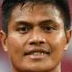

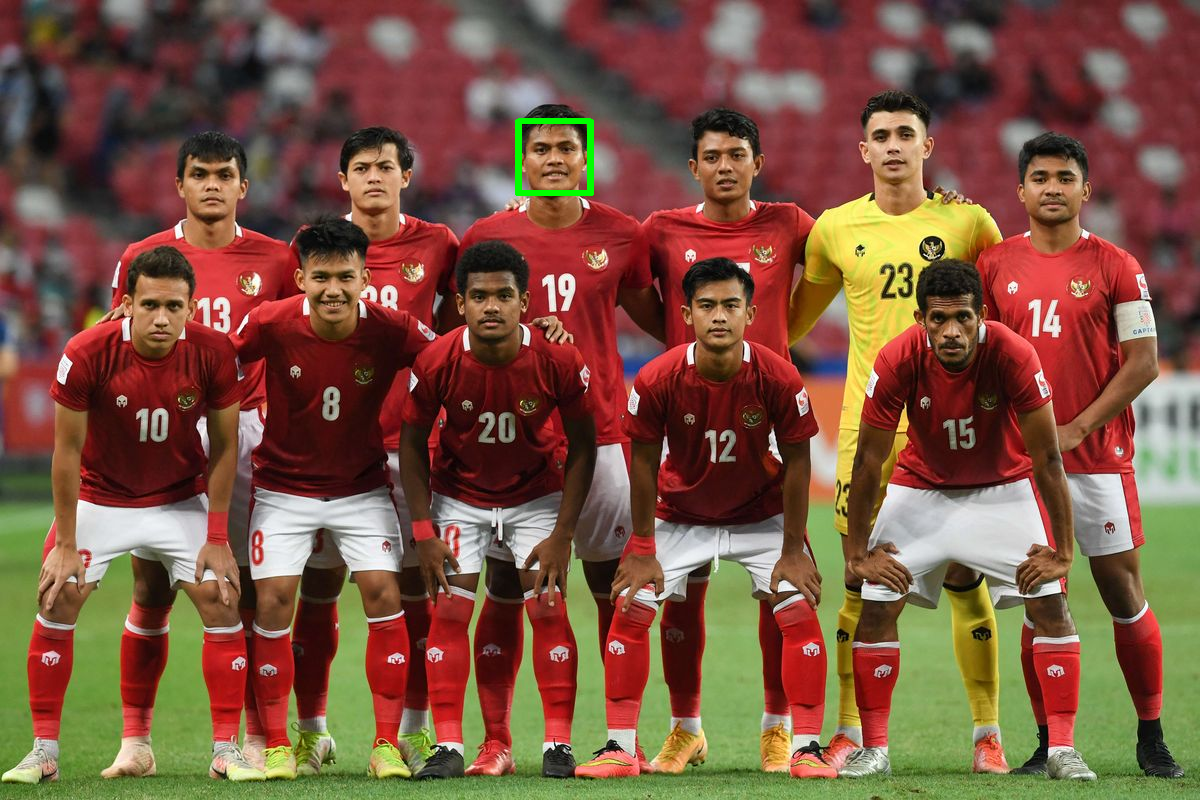

In [35]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Menggunakan Haar Cascade Classifier untuk deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Membaca gambar
img = cv2.imread('sample_data/timnas.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

# Mengambil wajah pertama yang terdeteksi dan melakukan crop
if len(faces) > 0:
    (x, y, w, h) = faces[0]  # Ambil wajah pertama
    face_crop = img[y:y+h, x:x+w]  # Crop wajah
    cv2_imshow(face_crop)  # Menampilkan wajah yang dicrop

    # Template Matching
    # Menggunakan wajah yang dicrop sebagai template
    result = cv2.matchTemplate(img_gray, cv2.cvtColor(face_crop, cv2.COLOR_BGR2GRAY), cv2.TM_CCOEFF_NORMED)

    # Menentukan threshold untuk pencocokan
    threshold = 0.8
    locations = np.where(result >= threshold)

    # Menandai hasil pencocokan pada gambar asli
    for pt in zip(*locations[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    # Menampilkan gambar dengan wajah yang terdeteksi melalui template matching
    cv2_imshow(img)

else:
    print("Tidak ada wajah yang terdeteksi.")